# Crimes in India - Phase 4

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

Load and Merge Data: We'll load the datasets and merge them into a single DataFrame. 

In [2]:
import pandas as pd

# Load the datasets
df_ipc = pd.read_excel(r'C:\Users\Dell\Documents\01_District_wise_crimes_committed_IPC_2001_2012.xlsx')
df_sc = pd.read_excel(r'C:\Users\Dell\Documents\02_01_District_wise_crimes_committed_against_SC_2001_2012.xlsx')
df_st = pd.read_excel(r'C:\Users\Dell\Documents\02_District_wise_crimes_committed_against_ST_2001_2012.xlsx')
df_children = pd.read_excel(r'C:\Users\Dell\Documents\03_District_wise_crimes_committed_against_children_2001_2012.xlsx')
df_women = pd.read_excel(r'C:\Users\Dell\Documents\42_District_wise_crimes_committed_against_women_2001_2012.xlsx')

# Display the heads of each dataframe to check the structure
print('IPC Crimes:')
print(df_ipc.head())
print('\
SC Crimes:')
print(df_sc.head())
print('\
ST Crimes:')
print(df_st.head())
print('\
Crimes Against Children:')
print(df_children.head())
print('\
Crimes Against Women:')
print(df_women.head())

IPC Crimes:
         STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001     101                 60   
1  ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2  ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3  ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4  ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   
2                                          2    27               0   
3                                          1    20               0   
4                                          1    23               0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0          50                      46  ...     30                1131   
1     

The datasets have been successfully loaded, and here are the structures of each:

IPC Crimes Dataset: Includes various types of crimes like murder, rape, kidnapping, theft, etc.
Crimes Against SCs Dataset: Focuses on crimes specifically against Scheduled Castes, including murder, rape, and other specific acts.
Crimes Against STs Dataset: Similar to the SC dataset but for Scheduled Tribes.
Crimes Against Children Dataset: Includes crimes specifically against children like murder, rape, kidnapping, and others.
Crimes Against Women Dataset: Focuses on crimes against women including rape, dowry deaths, and cruelty by husband or relatives.

Next, I will merge these datasets into a single DataFrame. The merge will be based on the common columns 'STATE/UT', 'DISTRICT', and 'YEAR'. Let's proceed with this step.

The column names for the 'YEAR' field vary across the datasets. In some datasets, it is labeled as 'Year' instead of 'YEAR'. This inconsistency is causing the KeyError during the merge process.

To fix this issue I'll standardize the column name 'Year' to 'YEAR' across all datasets and then retry merging the datasets.

Let's proceed with standardizing the column names and then attempt the merge again.


In [3]:
df_sc.rename(columns={'Year': 'YEAR'}, inplace=True)
df_st.rename(columns={'Year': 'YEAR'}, inplace=True)
df_children.rename(columns={'Year': 'YEAR'}, inplace=True)
df_women.rename(columns={'Year': 'YEAR'}, inplace=True)
print('Column names standardized.')

Column names standardized.


The column names have been standardized successfully. Now, I'll attempt to merge the datasets again.

In [4]:
df_merged = df_ipc.merge(df_sc, on=['STATE/UT', 'DISTRICT', 'YEAR'], how='outer', suffixes=('', '_SC'))
df_merged = df_merged.merge(df_st, on=['STATE/UT', 'DISTRICT', 'YEAR'], how='outer', suffixes=('', '_ST'))
df_merged = df_merged.merge(df_children, on=['STATE/UT', 'DISTRICT', 'YEAR'], how='outer', suffixes=('', '_Children'))
df_merged = df_merged.merge(df_women, on=['STATE/UT', 'DISTRICT', 'YEAR'], how='outer', suffixes=('', '_Women'))
print('Datasets merged successfully.')
print('Merged DataFrame shape:', df_merged.shape)

Datasets merged successfully.
Merged DataFrame shape: (9268, 72)


The datasets have been successfully merged. The merged DataFrame contains 9,268 rows and 72 columns.

In [5]:
# Checking the columns of the merged DataFrame to identify the correct column names
df_merged.head()

STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001   101.0               60.0   
1  ANDHRA PRADESH      ANANTAPUR  2001   151.0              125.0   
2  ANDHRA PRADESH       CHITTOOR  2001   101.0               57.0   
3  ANDHRA PRADESH       CUDDAPAH  2001    80.0               53.0   
4  ANDHRA PRADESH  EAST GODAVARI  2001    82.0               67.0   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                       17.0  50.0             0.0   
1                                        1.0  23.0             0.0   
2                                        2.0  27.0             0.0   
3                                        1.0  20.0             0.0   
4                                        1.0  23.0             0.0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  Prohibition of child marriage act  \
0        50.0                    46.0  ...                                0.0   
1        23.0                    53.0  ...                                0.0   
2        27.0                    59.0  ...                                0.0   
3        20.0                    25.0  ...                                0.0   
4        23.0                    49.0  ...                                0.0   

   Other Crimes  Total  Rape_Women  Kidnapping and Abduction_Women  \
0           0.0    0.0        50.0                            30.0   
1           0.0   66.0        23.0                            30.0   
2           0.0    0.0        27.0                            34.0   
3           0.0    0.0        20.0                            20.0   
4           0.0    0.0        23.0                            26.0   

   Dowry Deaths  Assault on women with intent to outrage her modesty  \
0          16.0                                              149.0     
1           7.0                                              118.0     
2          14.0                                              112.0     
3          17.0                                              126.0     
4          12.0                                              109.0     

   Insult to modesty of Women  Cruelty by Husband or his Relatives  \
0                        34.0                                175.0   
1                        24.0                                154.0   
2                        83.0                                186.0   
3                        38.0                                 57.0   
4                        58.0                                247.0   

   Importation of Girls  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 72 columns]

Let's check the NaN values

<Axes: >

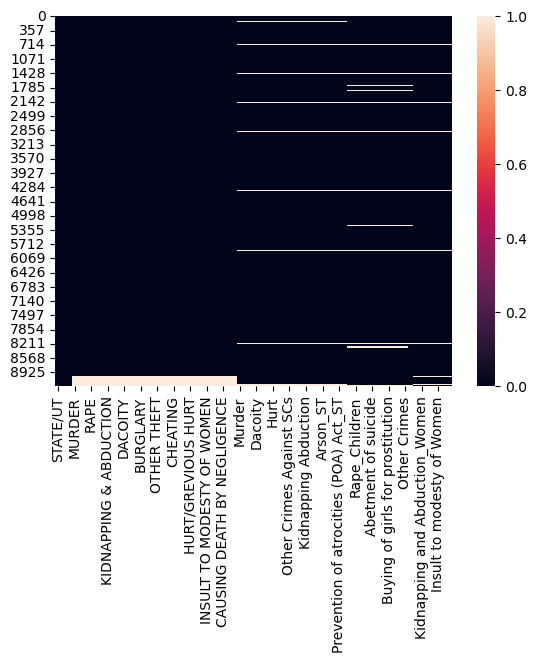

In [6]:
sns.heatmap(df_merged.isnull())

In [7]:
df_merged.isnull().sum()

STATE/UT                                                 0
DISTRICT                                                 0
YEAR                                                     0
MURDER                                                 239
ATTEMPT TO MURDER                                      239
                                                      ... 
Dowry Deaths                                           239
Assault on women with intent to outrage her modesty    239
Insult to modesty of Women                             239
Cruelty by Husband or his Relatives                    239
Importation of Girls                                   239
Length: 72, dtype: int64

Imputing missing values with the mean

In [8]:
df_merged.fillna(df_merged.mean(), inplace=True)

I'll remove columns that are less likely to influence the overall crime rate significantly or are redundant.

In [9]:
columns_to_remove = ['CUSTODIAL RAPE', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
                     'Protection of Civil Rights (PCR) Act', 'Protection of Civil Rights (PCR) Act_ST',
                     'Prohibition of child marriage act', 'Buying of girls for prostitution', 
                     'Selling of girls for prostitution','YEAR', 'ATTEMPT TO MURDER',
                     'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'OTHER RAPE', 'KIDNAPPING AND ABDUCTION OF OTHERS', 
                     'AUTO THEFT', 'OTHER THEFT','OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
                     'Murder', 'Rape', 'Kidnapping and Abduction', 'Dacoity', 'Robbery',
                     'Arson', 'Hurt', 'Prevention of atrocities (POA) Act',
                     'Other Crimes Against SCs', 'Murder_ST', 'Rape_ST',
                     'Kidnapping Abduction', 'Dacoity_ST', 'Robbery_ST', 'Arson_ST',
                     'Hurt_ST', 'Prevention of atrocities (POA) Act_ST',
                     'Other Crimes Against STs', 'Murder_Children', 'Rape_Children',
                     'Kidnapping and Abduction_Children','Total', 'Rape_Women', 'Kidnapping and Abduction_Women',
                     'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
                     'Insult to modesty of Women', 'Cruelty by Husband or his Relatives', 
                     'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS']

df_cleaned = df_merged.drop(columns=columns_to_remove)
print("Columns removed and dataset cleaned.")
print("Remaining columns:", df_cleaned.columns)

Columns removed and dataset cleaned.
Remaining columns: Index(['STATE/UT', 'DISTRICT', 'MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION',
       'DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'RIOTS',
       'CRIMINAL BREACH OF TRUST', 'CHEATING', 'COUNTERFIETING', 'ARSON',
       'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
       'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'CAUSING DEATH BY NEGLIGENCE', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Other Crimes', 'Importation of Girls'],
      dtype='object')


In [10]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')


In [11]:
df_cleaned.head(15)

STATE/UT        DISTRICT  MURDER  RAPE  KIDNAPPING & ABDUCTION  \
0   ANDHRA PRADESH        ADILABAD   101.0  50.0                    46.0   
1   ANDHRA PRADESH       ANANTAPUR   151.0  23.0                    53.0   
2   ANDHRA PRADESH        CHITTOOR   101.0  27.0                    59.0   
3   ANDHRA PRADESH        CUDDAPAH    80.0  20.0                    25.0   
4   ANDHRA PRADESH   EAST GODAVARI    82.0  23.0                    49.0   
5   ANDHRA PRADESH   GUNTAKAL RLY.     3.0   0.0                     0.0   
6   ANDHRA PRADESH          GUNTUR   182.0  54.0                    82.0   
7   ANDHRA PRADESH  HYDERABAD CITY   111.0  37.0                    80.0   
8   ANDHRA PRADESH      KARIMNAGAR   162.0  56.0                    67.0   
9   ANDHRA PRADESH         KHAMMAM    93.0  47.0                    41.0   
10  ANDHRA PRADESH         KRISHNA    65.0  37.0                    36.0   
11  ANDHRA PRADESH         KURNOOL   133.0  29.0                    47.0   
12  ANDHRA PRADESH   MAHABOOBNAGAR   157.0  59.0                    42.0   
13  ANDHRA PRADESH           MEDAK   101.0  35.0                    26.0   
14  ANDHRA PRADESH        NALGONDA   122.0  35.0                    27.0   

    DACOITY  ROBBERY  BURGLARY   THEFT  RIOTS  ...  \
0       9.0     41.0     198.0   199.0   78.0  ...   
1       8.0     16.0     191.0   366.0  168.0  ...   
2       4.0     14.0     237.0   723.0  156.0  ...   
3       1.0      4.0      98.0   173.0  164.0  ...   
4       4.0     25.0     437.0  1021.0   70.0  ...   
5       5.0      2.0       0.0   162.0    1.0  ...   
6      16.0     59.0     338.0  1122.0  244.0  ...   
7      13.0     67.0    1155.0  2792.0   65.0  ...   
8      27.0     50.0     218.0   392.0  220.0  ...   
9       1.0     13.0     172.0   368.0  153.0  ...   
10      3.0     15.0     163.0   478.0   70.0  ...   
11      6.0     22.0     155.0   297.0   84.0  ...   
12      8.0     27.0     249.0   316.0  157.0  ...   
13     27.0     26.0     219.0   286.0  100.0  ...   
14      6.0     28.0     133.0   318.0  220.0  ...   

    ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                               149.0     
1                                               118.0     
2                                               112.0     
3                                               126.0     
4                                               109.0     
5                                                 1.0     
6                                               139.0     
7                                               118.0     
8                                               414.0     
9                                               180.0     
10                                              208.0     
11                                              141.0     
12                                              176.0     
13                                              100.0     
14                                              188.0     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                         34.0                                175.0   
1                         24.0                                154.0   
2                         83.0                                186.0   
3                         38.0                                 57.0   
4                         58.0                                247.0   
5                          0.0                                  0.0   
6                        129.0                                378.0   
7                         27.0                                746.0   
8                         81.0                                224.0   
9                        336.0                                172.0   
10                        72.0                                265.0   
11                       107.0                                 92.0   
12                        41.0                              

4.1  "Create 3 clusters as below.

1. Sensitive Area's

2. Moderate Area's

3. Peaceful Area's"

In [12]:
cluster = df_cleaned.groupby(['STATE/UT', 'DISTRICT']).sum().reset_index()


In [13]:
cluster

STATE/UT         DISTRICT   MURDER     RAPE  KIDNAPPING & ABDUCTION  \
0    A & N ISLANDS  A and N ISLANDS     15.0      3.0                    12.0   
1    A & N ISLANDS          ANDAMAN    118.0     92.0                    73.0   
2    A & N ISLANDS              CAR      2.0      0.0                     1.0   
3    A & N ISLANDS          NICOBAR     12.0      2.0                     1.0   
4    A & N ISLANDS            NORTH      5.0      4.0                     0.0   
..             ...              ...      ...      ...                     ...   
900    WEST BENGAL   SEALDAH G.R.P.    188.0     19.0                    67.0   
901    WEST BENGAL  SILIGURI G.R.P.     42.0      2.0                    31.0   
902    WEST BENGAL      SILIGURI_PC     32.0     21.0                   123.0   
903    WEST BENGAL            TOTAL  21056.0  20787.0                 25999.0   
904    WEST BENGAL   UTTAR DINAJPUR    638.0    833.0                  1059.0   

     DACOITY  ROBBERY  BURGLARY     THEFT    RIOTS  ...  \
0        5.0      9.0      90.0     112.0     17.0  ...   
1        4.0     63.0     708.0     918.0    115.0  ...   
2        1.0      0.0       0.0       4.0      0.0  ...   
3        1.0      0.0      23.0      23.0      0.0  ...   
4        0.0      1.0       6.0      13.0      0.0  ...   
..       ...      ...       ...       ...      ...  ...   
900     18.0    115.0       0.0    2981.0    128.0  ...   
901     13.0     15.0       1.0    1154.0     26.0  ...   
902      3.0     29.0       3.0     849.0      9.0  ...   
903   2642.0   7354.0    5500.0  190468.0  51154.0  ...   
904    123.0    221.0      84.0    3684.0    683.0  ...   

     ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                 21.0     
1                                                168.0     
2                                                  1.0     
3                                                  8.0     
4                                                  2.0     
..                                                 ...     
900                                               56.0     
901                                               31.0     
902                                               35.0     
903                                            22871.0     
904                                              712.0     

     INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                           2.0                                 18.0   
1                          37.0                                 97.0   
2                           0.0                                  0.0   
3                           0.0                                  1.0   
4                           1.0                                  2.0   
..                          ...                                  ...   
900                         2.0                                 10.0   
901                         1.0                                  1.0   
902                        12.0                                370.0   
903                      1554.0                             130668.0   
904                         9.0                               3095.0   

     CAUSING DEATH BY NEGLIGENCE  Foeticide  Abetment of suicide  \
0                            4.0        0.0                  0.0   
1                           32.0        3.0                  0.0   
2                            1.0        0.0                  0.0   
3                            0.0        0.0                  0.0   
4                            0.0        0.0                  0.0   
..                           ...        ...                  ...   
900                          4.0        0.0                  0.0   
901                          0.0        0.0                  0.0   
902                         69.0        0.0                  0.0   
903                      37751.0        2.0                 15

In [14]:
x=cluster.iloc[:,2:]

In [15]:
kmeans=KMeans(n_clusters=3,random_state=0)
y=kmeans.fit_predict(x)

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

4.2  Create DataFrame for each cluster that shows data according to the areas.

In [17]:
peaceful_area=cluster[y==0]
peaceful_area

STATE/UT         DISTRICT  MURDER   RAPE  KIDNAPPING & ABDUCTION  \
0    A & N ISLANDS  A and N ISLANDS    15.0    3.0                    12.0   
1    A & N ISLANDS          ANDAMAN   118.0   92.0                    73.0   
2    A & N ISLANDS              CAR     2.0    0.0                     1.0   
3    A & N ISLANDS          NICOBAR    12.0    2.0                     1.0   
4    A & N ISLANDS            NORTH     5.0    4.0                     0.0   
..             ...              ...     ...    ...                     ...   
899    WEST BENGAL          PURULIA   733.0  497.0                   276.0   
900    WEST BENGAL   SEALDAH G.R.P.   188.0   19.0                    67.0   
901    WEST BENGAL  SILIGURI G.R.P.    42.0    2.0                    31.0   
902    WEST BENGAL      SILIGURI_PC    32.0   21.0                   123.0   
904    WEST BENGAL   UTTAR DINAJPUR   638.0  833.0                  1059.0   

     DACOITY  ROBBERY  BURGLARY   THEFT  RIOTS  ...  \
0        5.0      9.0      90.0   112.0   17.0  ...   
1        4.0     63.0     708.0   918.0  115.0  ...   
2        1.0      0.0       0.0     4.0    0.0  ...   
3        1.0      0.0      23.0    23.0    0.0  ...   
4        0.0      1.0       6.0    13.0    0.0  ...   
..       ...      ...       ...     ...    ...  ...   
899     63.0    278.0      49.0  2526.0  920.0  ...   
900     18.0    115.0       0.0  2981.0  128.0  ...   
901     13.0     15.0       1.0  1154.0   26.0  ...   
902      3.0     29.0       3.0   849.0    9.0  ...   
904    123.0    221.0      84.0  3684.0  683.0  ...   

     ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                 21.0     
1                                                168.0     
2                                                  1.0     
3                                                  8.0     
4                                                  2.0     
..                                                 ...     
899                                              601.0     
900                                               56.0     
901                                               31.0     
902                                               35.0     
904                                              712.0     

     INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                           2.0                                 18.0   
1                          37.0                                 97.0   
2                           0.0                                  0.0   
3                           0.0                                  1.0   
4                           1.0                                  2.0   
..                          ...                                  ...   
899                         0.0                               1778.0   
900                         2.0                                 10.0   
901                         1.0                                  1.0   
902                        12.0                                370.0   
904                         9.0                               3095.0   

     CAUSING DEATH BY NEGLIGENCE  Foeticide  Abetment of suicide  \
0                            4.0        0.0                  0.0   
1                           32.0        3.0                  0.0   
2                            1.0        0.0                  0.0   
3                            0.0        0.0                  0.0   
4                            0.0        0.0                  0.0   
..                           ...        ...                  ...   
899                        206.0        0.0                  0.0   
900                          4.0        0.0                  0.0   
901                          0.0        0.0                  0.0   
902                         69.0        0.0                  0.0   
904                       1029.0        0.0                  0.0   

     Expo

In [18]:
moderate_area=cluster[y==1]
moderate_area

STATE/UT        DISTRICT   MURDER     RAPE  KIDNAPPING & ABDUCTION  \
138          BIHAR           TOTAL  41245.0  13124.0                 37220.0   
212       DELHI UT  DELHI UT TOTAL   6205.0   6424.0                 25083.0   
267        GUJARAT           TOTAL  13775.0   4249.0                 15246.0   
415      KARNATAKA           TOTAL  19937.0   5174.0                 10029.0   
442         KERALA           TOTAL   4733.0   7447.0                  2891.0   
719      RAJASTHAN           TOTAL  15844.0  15798.0                 30727.0   
762     TAMIL NADU           TOTAL  20127.0   6952.0                 15303.0   
857  UTTAR PRADESH           TOTAL  65443.0  19058.0                 59266.0   
903    WEST BENGAL           TOTAL  21056.0  20787.0                 25999.0   

     DACOITY  ROBBERY  BURGLARY     THEFT     RIOTS  ...  \
138  11099.0  23666.0   40293.0  153372.0  105096.0  ...   
212    381.0   6461.0   23555.0  231546.0     996.0  ...   
267   3842.0  14383.0   60689.0  213207.0   22192.0  ...   
415   2581.0  17287.0   73298.0  199960.0   78421.0  ...   
442   1364.0   8329.0   46371.0   62353.0   96274.0  ...   
719    563.0   9071.0   65268.0  232974.0   36073.0  ...   
762   1237.0  11272.0   53339.0  185160.0   37368.0  ...   
857   4809.0  30767.0   65587.0  312047.0   54110.0  ...   
903   2642.0   7354.0    5500.0  190468.0   51154.0  ...   

     ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
138                                             7576.0     
212                                             7534.0     
267                                             8998.0     
415                                            23699.0     
442                                            31490.0     
719                                            30853.0     
762                                            19329.0     
857                                            29698.0     
903                                            22871.0     

     INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
138                       226.0                              25680.0   
212                      1687.0                              15211.0   
267                      1365.0                              59431.0   
415                       831.0                              30052.0   
442                      3304.0                              46074.0   
719                       354.0                             100101.0   
762                     10043.0                              18188.0   
857                     26511.0                              77617.0   
903                      1554.0                             130668.0   

     CAUSING DEATH BY NEGLIGENCE   Foeticide  Abetment of suicide  \
138                      44442.0    9.000000             0.000000   
212                       7503.0    3.290151             1.484028   
267                      54385.0   49.000000            16.000000   
415                       5078.0   59.000000             4.000000   
442                        489.0    4.000000            14.000000   
719                      78350.0  184.000000             9.000000   
762                     140193.0    0.000000             9.000000   
857                     113821.0   53.000000            73.000000   
903                      37751.0    2.000000            15.000000   

     Exposure and abandonment  Procuration of minor girls  Other Crimes  \
138                  5.000000                   564.00000    131.000000   
212                 25.268412                    10.85803    180.527063   
267               1395.000000                   103.00000   2352.000000   
415                271.000000                   112.00000    435.000000   
442                 62.000000                   167.00000   2792.000000   
719               1426.000000                    61.00000    283.000000   
762                104.000000                    51.00000    449.00000

In [19]:
sensitive_area=cluster[y==2]
sensitive_area

STATE/UT DISTRICT   MURDER     RAPE  KIDNAPPING & ABDUCTION  \
32   ANDHRA PRADESH    TOTAL  31756.0  13479.0                 21239.0   
500  MADHYA PRADESH    TOTAL  28399.0  36087.0                 11958.0   
547     MAHARASHTRA    TOTAL  32767.0  17986.0                 15101.0   

     DACOITY  ROBBERY  BURGLARY     THEFT    RIOTS  ...  \
32    1987.0   7605.0   97336.0  287190.0  27459.0  ...   
500   1655.0  22314.0  137346.0  263860.0  31124.0  ...   
547   8175.0  37719.0  185617.0  556807.0  90244.0  ...   

     ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
32                                             51999.0     
500                                            79878.0     
547                                            39219.0     

     INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
32                      36131.0                             119007.0   
500                      9317.0                              39969.0   
547                     12110.0                              80363.0   

     CAUSING DEATH BY NEGLIGENCE  Foeticide  Abetment of suicide  \
32                      138435.0       23.0                107.0   
500                      64969.0      234.0                 99.0   
547                     134613.0      120.0                106.0   

     Exposure and abandonment  Procuration of minor girls  Other Crimes  \
32                      595.0                       541.0        4145.0   
500                    1224.0                       125.0       27211.0   
547                    3112.0                       254.0       10705.0   

     Importation of Girls  
32                   17.0  
500                  60.0  
547                   2.0  

[3 rows x 26 columns]

In [20]:
peaceful_area['OVERALL CRIME']=peaceful_area.iloc[:,2:].sum(axis=1)
peaceful_area.sort_values(by='OVERALL CRIME',ascending=True,inplace=True)
peaceful_area.head(10).reset_index().drop(['index'],axis=1)

STATE/UT          DISTRICT  MURDER  RAPE  KIDNAPPING & ABDUCTION  \
0   JAMMU & KASHMIR    RAILWAYS KATRA     0.0   0.0                     0.0   
1  HIMACHAL PRADESH               CID     0.0   0.0                     0.0   
2   JAMMU & KASHMIR      RAILWAYS KMR     0.0   0.0                     0.0   
3           TRIPURA            G.R.P.     0.0   0.0                     0.0   
4           MANIPUR               CID     0.0   0.0                     0.0   
5   JAMMU & KASHMIR    RAILWAYS JAMMU     0.0   0.0                     0.0   
6           TRIPURA               GRP     2.0   0.0                     0.0   
7     A & N ISLANDS               CAR     2.0   0.0                     1.0   
8   JAMMU & KASHMIR  RAILWAYS KASHMIR     0.0   0.0                     1.0   
9   JAMMU & KASHMIR     CRIME KASHMIR     0.0   0.0                     0.0   

   DACOITY  ROBBERY  BURGLARY  THEFT  RIOTS  ...  INSULT TO MODESTY OF WOMEN  \
0      0.0      0.0       0.0    2.0    0.0  ...                         0.0   
1      0.0      0.0       0.0    1.0    0.0  ...                         0.0   
2      0.0      0.0       1.0    0.0    0.0  ...                         0.0   
3      0.0      0.0       1.0    3.0    0.0  ...                         0.0   
4      0.0      0.0       0.0    0.0    0.0  ...                         0.0   
5      0.0      0.0       0.0    6.0    0.0  ...                         1.0   
6      0.0      0.0       0.0    8.0    1.0  ...                         0.0   
7      1.0      0.0       0.0    4.0    0.0  ...                         0.0   
8      0.0      0.0       1.0   18.0    3.0  ...                         1.0   
9      0.0      0.0       0.0    0.0    0.0  ...                         0.0   

   CRUELTY BY HUSBAND OR HIS RELATIVES  CAUSING DEATH BY NEGLIGENCE  \
0                                  0.0                          0.0   
1                                  0.0                          0.0   
2                                  0.0                          0.0   
3                                  0.0                          0.0   
4                                  0.0                          0.0   
5                                  0.0                          2.0   
6                                  0.0                          0.0   
7                                  0.0                          1.0   
8                                  0.0                          0.0   
9                                  0.0                          0.0   

   Foeticide  Abetment of suicide  Exposure and abandonment  \
0        0.0                  0.0                       0.0   
1        0.0                  0.0                       0.0   
2        0.0                  0.0                       0.0   
3        0.0                  0.0                       0.0   
4        0.0                  0.0                       0.0   
5        0.0                  0.0                       0.0   
6        0.0                  0.0                       0.0   
7        0.0                  0.0                       0.0   
8        0.0                  0.0                       0.0   
9        0.0                  0.0                       0.0   

   Procuration of minor girls  Other Crimes  Importation of Girls  \
0                         0.0           0.0                   0.0   
1                         0.0           0.0                   0.0   
2                         0.0           0.0                   0.0   
3                         0.0           0.0                   0.0   
4                         0.0           0.0                   0.0   
5                         0.0           0.0                   0.0   
6                         0.0           0.0                   0.0   
7                         0.0           1.0                   0.0   
8                         0.0           0.0                   0.0   
9                         0.0           0.0                   0.0   

   OVERALL CRIME  
0    

In [21]:
moderate_area['OVERALL CRIME']=moderate_area.iloc[:,2:].sum(axis=1)
moderate_area.sort_values(by='OVERALL CRIME',ascending=True,inplace=True)
moderate_area.head(10).reset_index().drop(['index'],axis=1)

STATE/UT        DISTRICT   MURDER     RAPE  KIDNAPPING & ABDUCTION  \
0       DELHI UT  DELHI UT TOTAL   6205.0   6424.0                 25083.0   
1         KERALA           TOTAL   4733.0   7447.0                  2891.0   
2        GUJARAT           TOTAL  13775.0   4249.0                 15246.0   
3    WEST BENGAL           TOTAL  21056.0  20787.0                 25999.0   
4          BIHAR           TOTAL  41245.0  13124.0                 37220.0   
5      KARNATAKA           TOTAL  19937.0   5174.0                 10029.0   
6     TAMIL NADU           TOTAL  20127.0   6952.0                 15303.0   
7      RAJASTHAN           TOTAL  15844.0  15798.0                 30727.0   
8  UTTAR PRADESH           TOTAL  65443.0  19058.0                 59266.0   

   DACOITY  ROBBERY  BURGLARY     THEFT     RIOTS  ...  \
0    381.0   6461.0   23555.0  231546.0     996.0  ...   
1   1364.0   8329.0   46371.0   62353.0   96274.0  ...   
2   3842.0  14383.0   60689.0  213207.0   22192.0  ...   
3   2642.0   7354.0    5500.0  190468.0   51154.0  ...   
4  11099.0  23666.0   40293.0  153372.0  105096.0  ...   
5   2581.0  17287.0   73298.0  199960.0   78421.0  ...   
6   1237.0  11272.0   53339.0  185160.0   37368.0  ...   
7    563.0   9071.0   65268.0  232974.0   36073.0  ...   
8   4809.0  30767.0   65587.0  312047.0   54110.0  ...   

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                      1687.0                              15211.0   
1                      3304.0                              46074.0   
2                      1365.0                              59431.0   
3                      1554.0                             130668.0   
4                       226.0                              25680.0   
5                       831.0                              30052.0   
6                     10043.0                              18188.0   
7                       354.0                             100101.0   
8                     26511.0                              77617.0   

   CAUSING DEATH BY NEGLIGENCE   Foeticide  Abetment of suicide  \
0                       7503.0    3.290151             1.484028   
1                        489.0    4.000000            14.000000   
2                      54385.0   49.000000            16.000000   
3                      37751.0    2.000000            15.000000   
4                      44442.0    9.000000             0.000000   
5                       5078.0   59.000000             4.000000   
6                     140193.0    0.000000             9.000000   
7                      78350.0  184.000000             9.000000   
8                     113821.0   53.000000            73.000000   

   Exposure and abandonment  Procuration of minor girls  Other Crimes  \
0                 25.268412                    10.85803    180.527063   
1                 62.000000                   167.00000   2792.000000   
2               1395.000000                   103.00000   2352.000000   
3                 14.000000                  1160.00000    770.000000   
4                  5.000000                   564.00000    131.000000   
5                271.000000                   112.00000    435.000000   
6                104.000000                    51.00000    449.000000   
7               1426.000000                    61.00000    283.000000   
8                  2.000000                    89.00000   5243.000000   

   Importation of Girls  OVERALL CRIME  
0              2.371027   3.885388e+05  
1              0.000000   6.016120e+05  
2              0.000000   6.532810e+05  
3            114.000000   6.632380e+05  
4            440.000000   7.625550e+05  
5             47.000000   7.785260e+05  
6             15.000000   8.474270e+05  
7              6.000000   1.049876e+06  
8              3.000000   1.157861e+06  

[9 rows x 27 columns]

In [22]:
sensitive_area['OVERALL CRIME']=sensitive_area.iloc[:,2:].sum(axis=1)
sensitive_area.sort_values(by='OVERALL CRIME',ascending=True,inplace=True)
sensitive_area.head(10).reset_index().drop(['index'],axis=1)

STATE/UT DISTRICT   MURDER     RAPE  KIDNAPPING & ABDUCTION  DACOITY  \
0  MADHYA PRADESH    TOTAL  28399.0  36087.0                 11958.0   1655.0   
1  ANDHRA PRADESH    TOTAL  31756.0  13479.0                 21239.0   1987.0   
2     MAHARASHTRA    TOTAL  32767.0  17986.0                 15101.0   8175.0   

   ROBBERY  BURGLARY     THEFT    RIOTS  ...  INSULT TO MODESTY OF WOMEN  \
0  22314.0  137346.0  263860.0  31124.0  ...                      9317.0   
1   7605.0   97336.0  287190.0  27459.0  ...                     36131.0   
2  37719.0  185617.0  556807.0  90244.0  ...                     12110.0   

   CRUELTY BY HUSBAND OR HIS RELATIVES  CAUSING DEATH BY NEGLIGENCE  \
0                              39969.0                      64969.0   
1                             119007.0                     138435.0   
2                              80363.0                     134613.0   

   Foeticide  Abetment of suicide  Exposure and abandonment  \
0      234.0                 99.0                    1224.0   
1       23.0                107.0                     595.0   
2      120.0                106.0                    3112.0   

   Procuration of minor girls  Other Crimes  Importation of Girls  \
0                       125.0       27211.0                  60.0   
1                       541.0        4145.0                  17.0   
2                       254.0       10705.0                   2.0   

   OVERALL CRIME  
0      1213248.0  
1      1517877.0  
2      1702018.0  

[3 rows x 27 columns]

4.3  "Analyze your clusters and prepare a report that explains all your observations.

In [23]:
import matplotlib.pyplot as plt
sensitive_area.corr()

MURDER      RAPE  \
MURDER                                              1.000000 -0.916172   
RAPE                                               -0.916172  1.000000   
KIDNAPPING & ABDUCTION                              0.597263 -0.868643   
DACOITY                                             0.711571 -0.370324   
ROBBERY                                             0.234064  0.175208   
BURGLARY                                            0.273362  0.135072   
THEFT                                               0.729929 -0.394795   
RIOTS                                               0.639990 -0.278385   
CRIMINAL BREACH OF TRUST                            0.911656 -0.670529   
CHEATING                                            0.900298 -0.999279   
COUNTERFIETING                                      0.999665 -0.926237   
ARSON                                               0.909205 -0.666122   
HURT/GREVIOUS HURT                                 -0.001505 -0.399405   
DOWRY DEATHS                                       -0.980476  0.819475   
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MOD... -0.995999  0.876693   
INSULT TO MODESTY OF WOMEN                          0.385328 -0.722863   
CRUELTY BY HUSBAND OR HIS RELATIVES                 0.742682 -0.948808   
CAUSING DEATH BY NEGLIGENCE                         0.964001 -0.989759   
Foeticide                                          -0.764824  0.958912   
Abetment of suicide                                 0.943462 -0.997226   
Exposure and abandonment                            0.482979 -0.091552   
Procuration of minor girls                          0.571571 -0.852522   
Other Crimes                                       -0.876372  0.995940   
Importation of Girls                               -0.999583  0.904224   
OVERALL CRIME                                       0.987337 -0.840991   

                                                    KIDNAPPING & ABDUCTION  \
MURDER                                                            0.597263   
RAPE                                                             -0.868643   
KIDNAPPING & ABDUCTION                                            1.000000   
DACOITY                                                          -0.138534   
ROBBERY                                                          -0.639968   
BURGLARY                                                         -0.608227   
THEFT                                                            -0.112257   
RIOTS                                                            -0.234035   
CRIMINAL BREACH OF TRUST                                          0.214894   
CHEATING                                                          0.886824   
COUNTERFIETING                                                    0.617819   
ARSON                                                             0.209104   
HURT/GREVIOUS HURT                                                0.801145   
DOWRY DEATHS                                                     -0.427888   
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MOD...               -0.523202   
INSULT TO MODESTY OF WOMEN                                        0.970253   
CRUELTY BY HUSBAND OR HIS RELATIVES                               0.980662   
CAUSING DEATH BY NEGLIGENCE                                       0.789026   
Foeticide                                                        -0.973510   
Abetment of suicide                                               0.829358   
Exposure and abandonment                                         -0.413831   
Procuration of minor girls                                        0.999499   
Other Crimes                                                     -0.909718   
Importation of Girls                                             -0.573867   
OVERALL CRIME                                                     0.462465   

                                                     DACOITY   ROBBERY  \
MURDER                    

In [24]:
moderate_area.corr()

MURDER      RAPE  \
MURDER                                              1.000000  0.583586   
RAPE                                                0.583586  1.000000   
KIDNAPPING & ABDUCTION                              0.858971  0.719950   
DACOITY                                             0.621818  0.228614   
ROBBERY                                             0.917767  0.265366   
BURGLARY                                            0.236018 -0.309624   
THEFT                                               0.545411  0.349292   
RIOTS                                               0.278175  0.131614   
CRIMINAL BREACH OF TRUST                            0.872806  0.507496   
CHEATING                                            0.228357  0.472709   
COUNTERFIETING                                      0.530689  0.155367   
ARSON                                               0.186343  0.018421   
HURT/GREVIOUS HURT                                 -0.029818 -0.160702   
DOWRY DEATHS                                        0.973243  0.658504   
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MOD...  0.126785  0.404686   
INSULT TO MODESTY OF WOMEN                          0.752178  0.362486   
CRUELTY BY HUSBAND OR HIS RELATIVES                 0.151974  0.771656   
CAUSING DEATH BY NEGLIGENCE                         0.516919  0.304700   
Foeticide                                           0.030695  0.216029   
Abetment of suicide                                 0.741569  0.493539   
Exposure and abandonment                           -0.286574 -0.157787   
Procuration of minor girls                          0.110708  0.598969   
Other Crimes                                        0.532142  0.232989   
Importation of Girls                                0.345183  0.242403   
OVERALL CRIME                                       0.699673  0.526156   

                                                    KIDNAPPING & ABDUCTION  \
MURDER                                                            0.858971   
RAPE                                                              0.719950   
KIDNAPPING & ABDUCTION                                            1.000000   
DACOITY                                                           0.444307   
ROBBERY                                                           0.679436   
BURGLARY                                                          0.015255   
THEFT                                                             0.719279   
RIOTS                                                            -0.067650   
CRIMINAL BREACH OF TRUST                                          0.834199   
CHEATING                                                          0.403978   
COUNTERFIETING                                                    0.282091   
ARSON                                                             0.037609   
HURT/GREVIOUS HURT                                               -0.308192   
DOWRY DEATHS                                                      0.919225   
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MOD...                0.037000   
INSULT TO MODESTY OF WOMEN                                        0.637611   
CRUELTY BY HUSBAND OR HIS RELATIVES                               0.304256   
CAUSING DEATH BY NEGLIGENCE                                       0.472742   
Foeticide                                                         0.209165   
Abetment of suicide                                               0.670703   
Exposure and abandonment                                         -0.131292   
Procuration of minor girls                                        0.107114   
Other Crimes                                                      0.396490   
Importation of Girls                                              0.258987   
OVERALL CRIME                                                     0.595528   

                                                     DACOITY   ROBBERY  \
MURDER                    

In [25]:
peaceful_area.corr()

MURDER      RAPE  \
MURDER                                              1.000000  0.900701   
RAPE                                                0.900701  1.000000   
KIDNAPPING & ABDUCTION                              0.809508  0.833912   
DACOITY                                             0.881748  0.800753   
ROBBERY                                             0.822405  0.751773   
BURGLARY                                            0.788162  0.799582   
THEFT                                               0.701596  0.652435   
RIOTS                                               0.797435  0.772442   
CRIMINAL BREACH OF TRUST                            0.765461  0.709737   
CHEATING                                            0.559698  0.479817   
COUNTERFIETING                                      0.577082  0.565018   
ARSON                                               0.777084  0.856307   
HURT/GREVIOUS HURT                                  0.702420  0.723915   
DOWRY DEATHS                                        0.836131  0.703324   
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MOD...  0.725239  0.822015   
INSULT TO MODESTY OF WOMEN                          0.449940  0.354094   
CRUELTY BY HUSBAND OR HIS RELATIVES                 0.678398  0.752176   
CAUSING DEATH BY NEGLIGENCE                         0.794764  0.779241   
Foeticide                                           0.411510  0.402175   
Abetment of suicide                                 0.381882  0.444981   
Exposure and abandonment                            0.172881  0.164082   
Procuration of minor girls                          0.414748  0.479580   
Other Crimes                                        0.350327  0.467787   
Importation of Girls                                0.355798  0.233058   
OVERALL CRIME                                       0.859312  0.847982   

                                                    KIDNAPPING & ABDUCTION  \
MURDER                                                            0.809508   
RAPE                                                              0.833912   
KIDNAPPING & ABDUCTION                                            1.000000   
DACOITY                                                           0.720965   
ROBBERY                                                           0.666291   
BURGLARY                                                          0.666336   
THEFT                                                             0.648868   
RIOTS                                                             0.769484   
CRIMINAL BREACH OF TRUST                                          0.804704   
CHEATING                                                          0.525519   
COUNTERFIETING                                                    0.604502   
ARSON                                                             0.822732   
HURT/GREVIOUS HURT                                                0.561465   
DOWRY DEATHS                                                      0.618025   
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MOD...                0.609336   
INSULT TO MODESTY OF WOMEN                                        0.363875   
CRUELTY BY HUSBAND OR HIS RELATIVES                               0.774012   
CAUSING DEATH BY NEGLIGENCE                                       0.679502   
Foeticide                                                         0.265841   
Abetment of suicide                                               0.233780   
Exposure and abandonment                                          0.132224   
Procuration of minor girls                                        0.523907   
Other Crimes                                                      0.152397   
Importation of Girls                                              0.203908   
OVERALL CRIME                                                     0.775822   

                                                     DACOITY   ROBBERY  \
MURDER                    

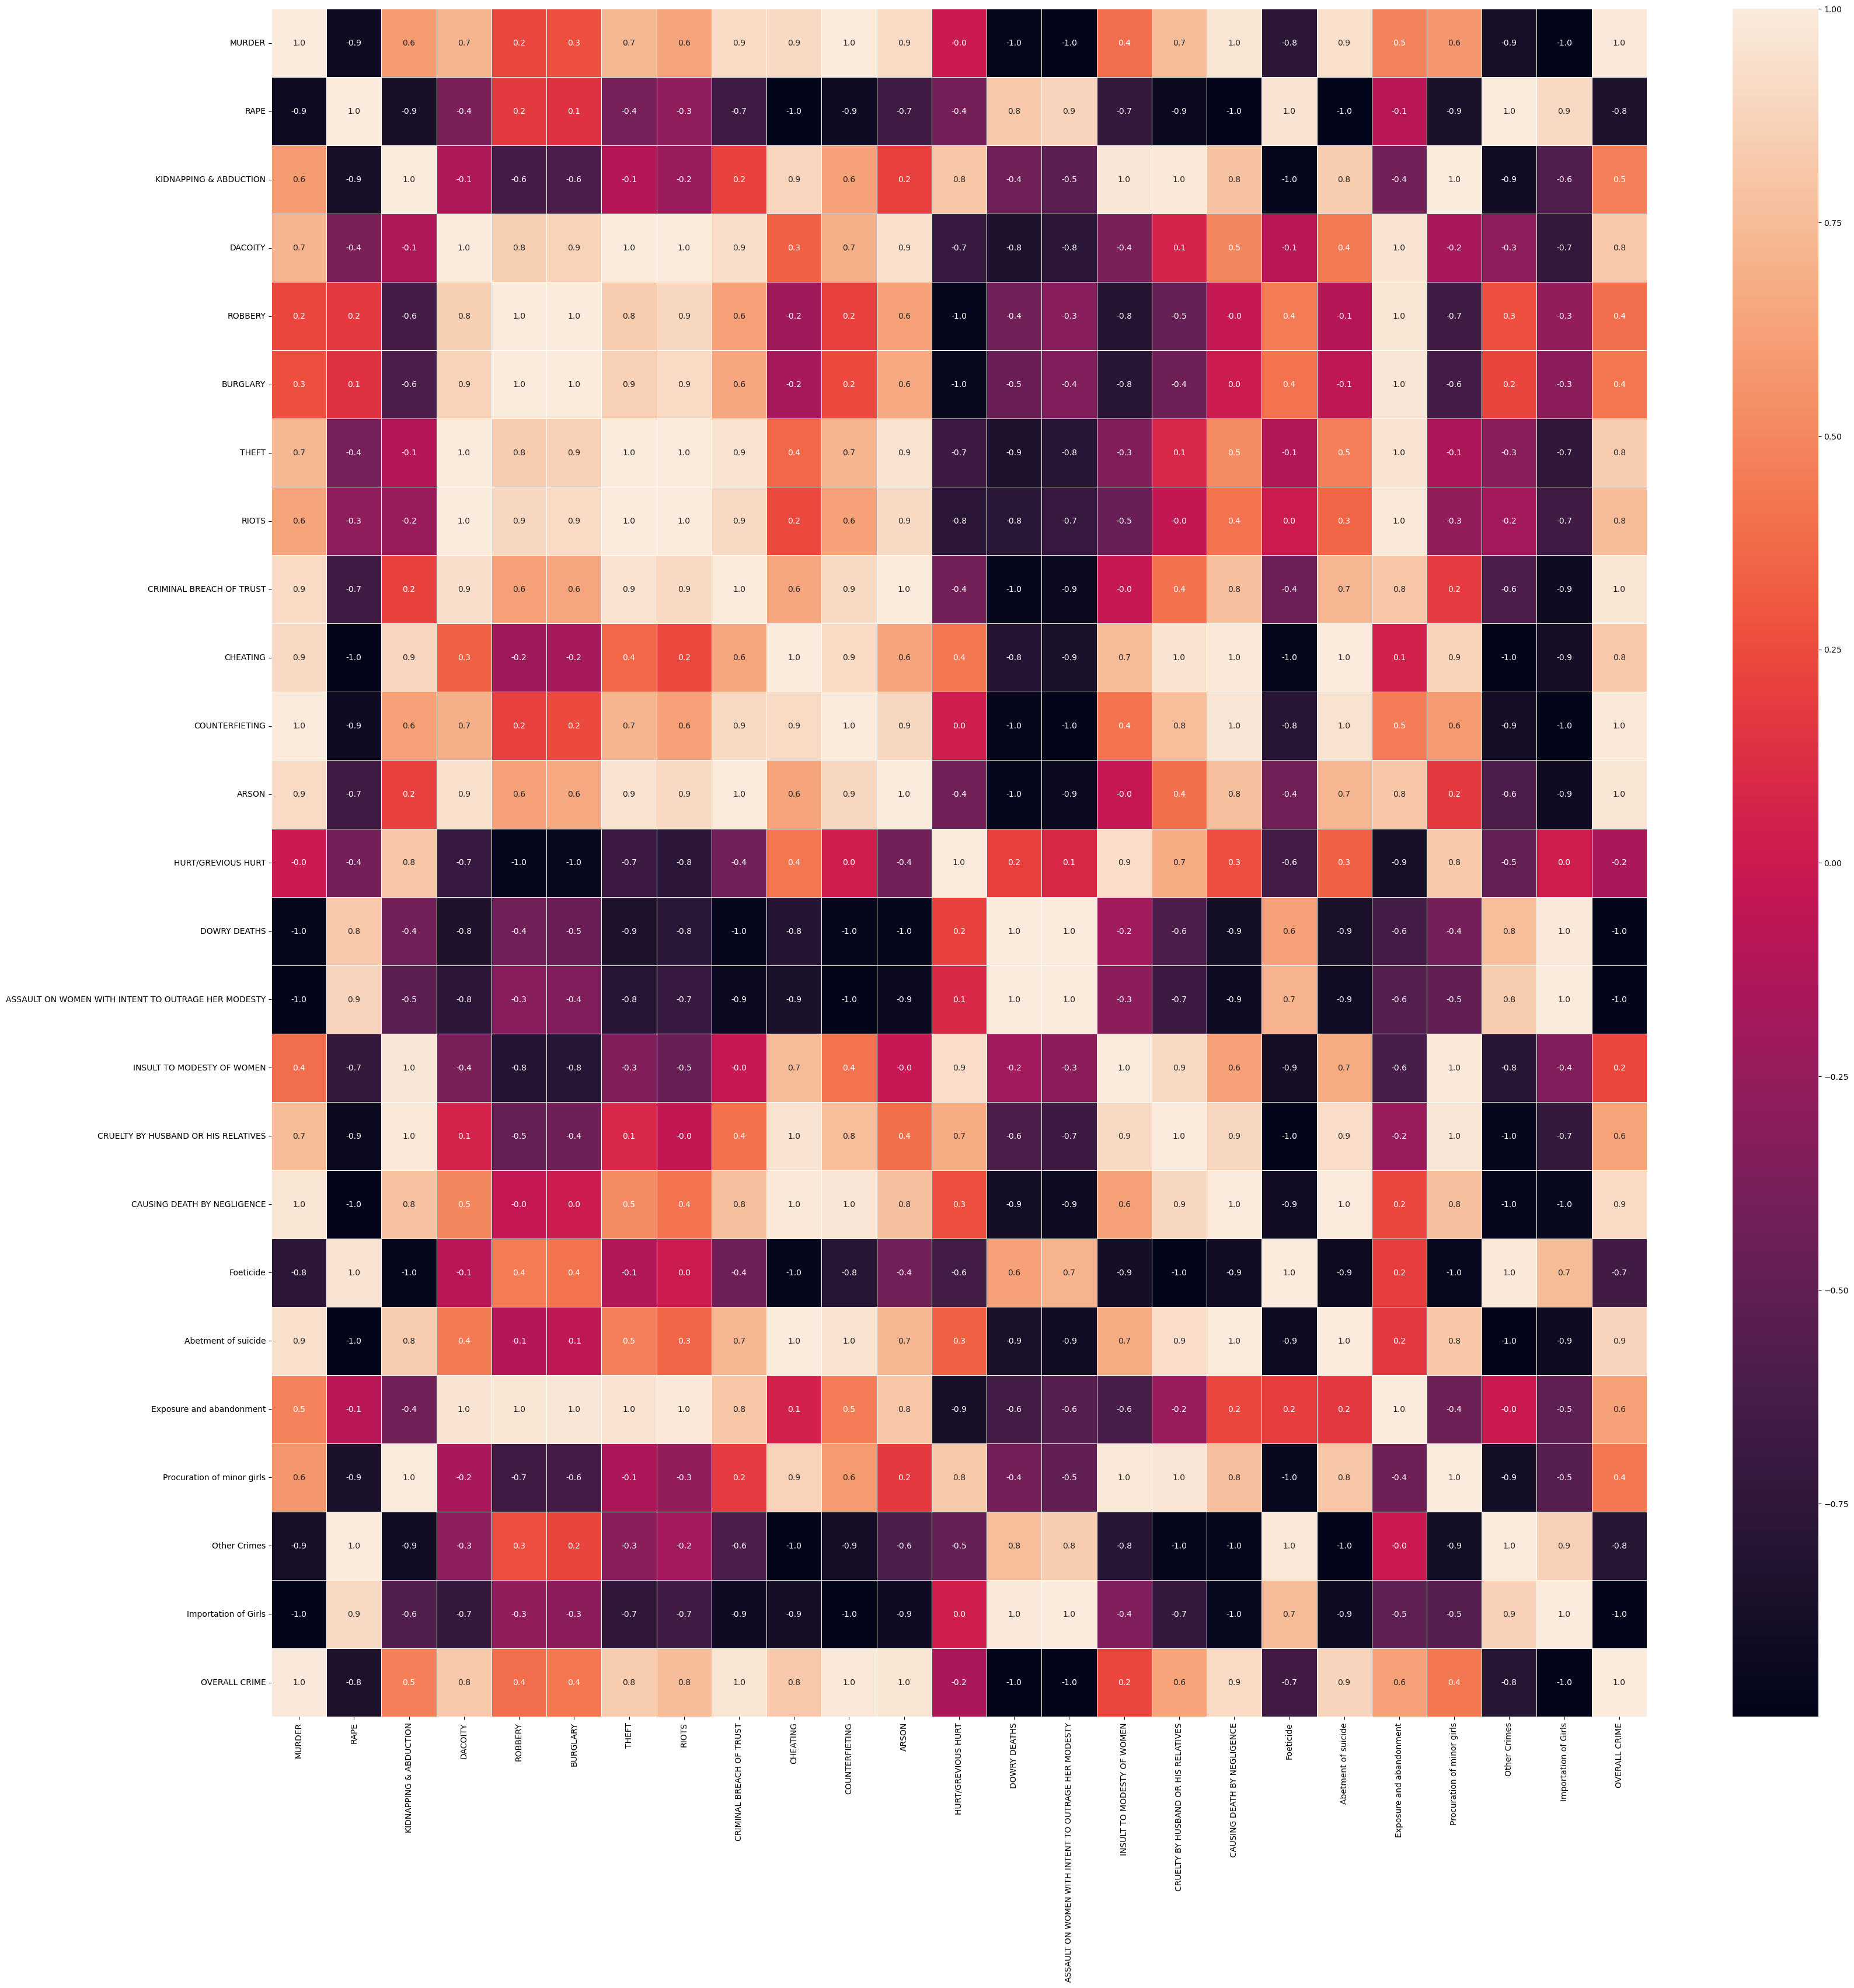

In [26]:
f,ax = plt.subplots(figsize=(38, 38))
sns.heatmap(sensitive_area.corr(), annot=True, linewidths=.4, fmt= '.1f',ax=ax)
plt.show()

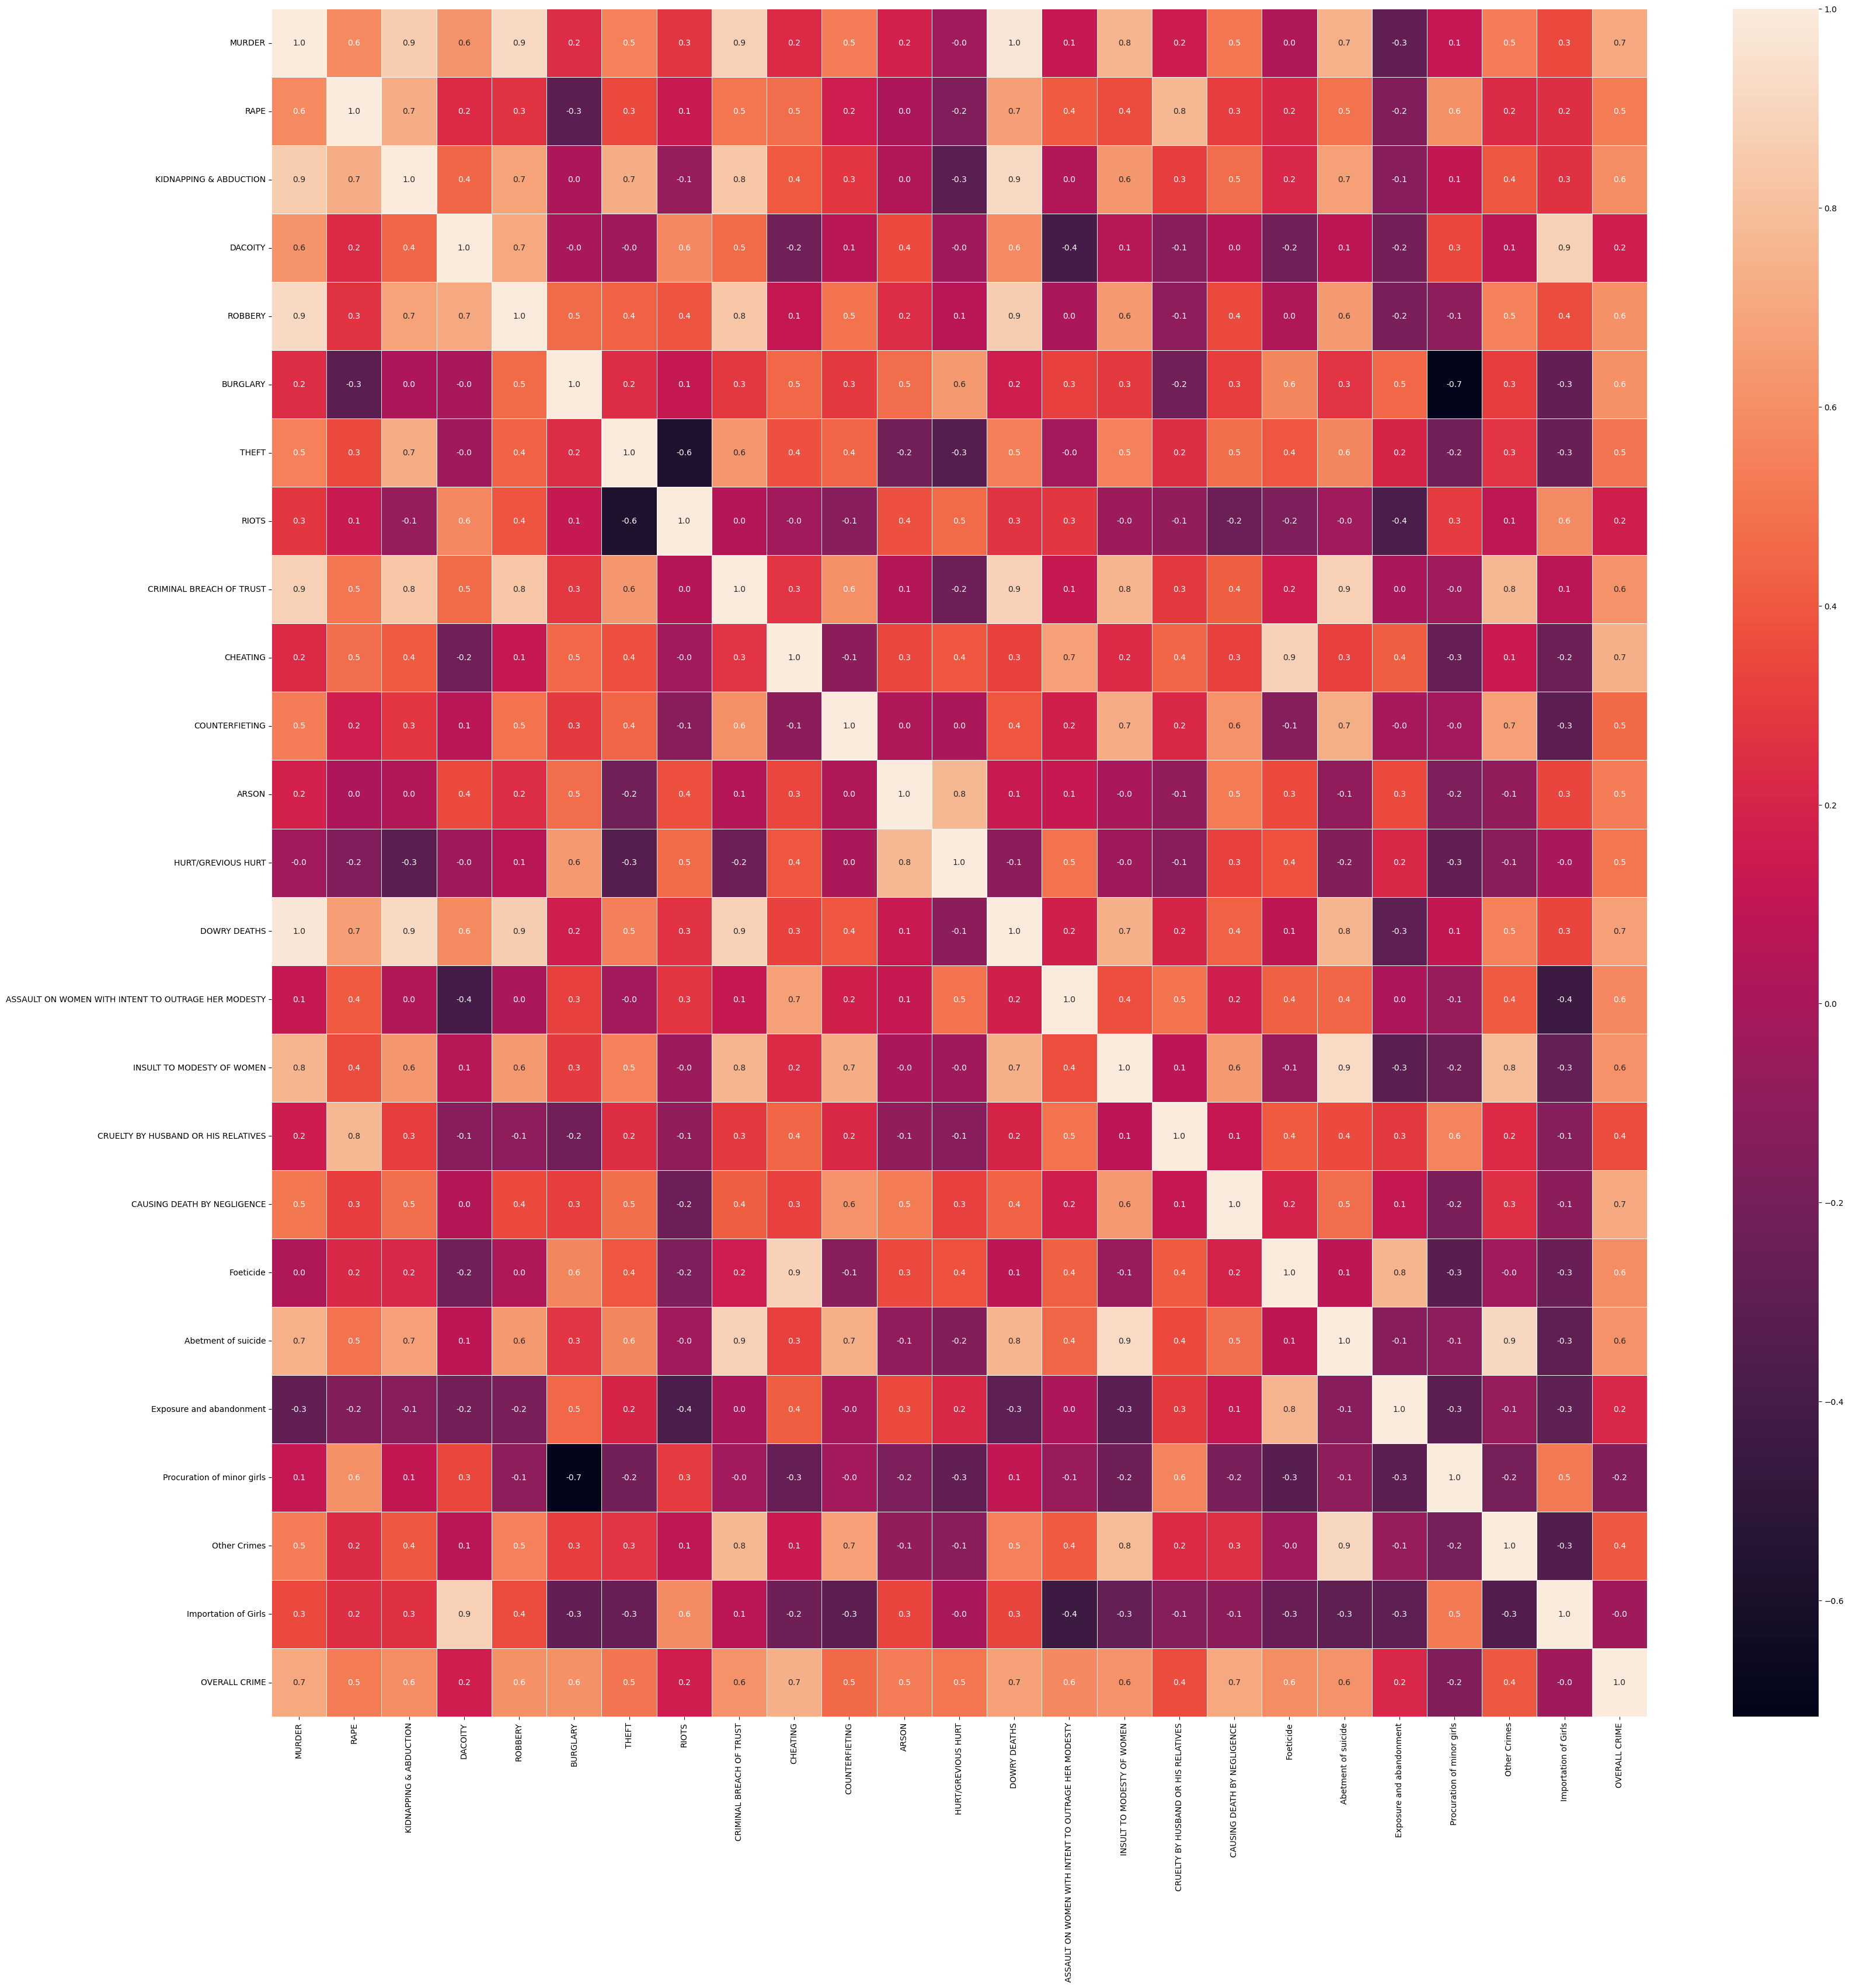

In [27]:
f,ax = plt.subplots(figsize=(38, 38))
sns.heatmap(moderate_area.corr(), annot=True, linewidths=.4, fmt= '.1f',ax=ax)
plt.show()

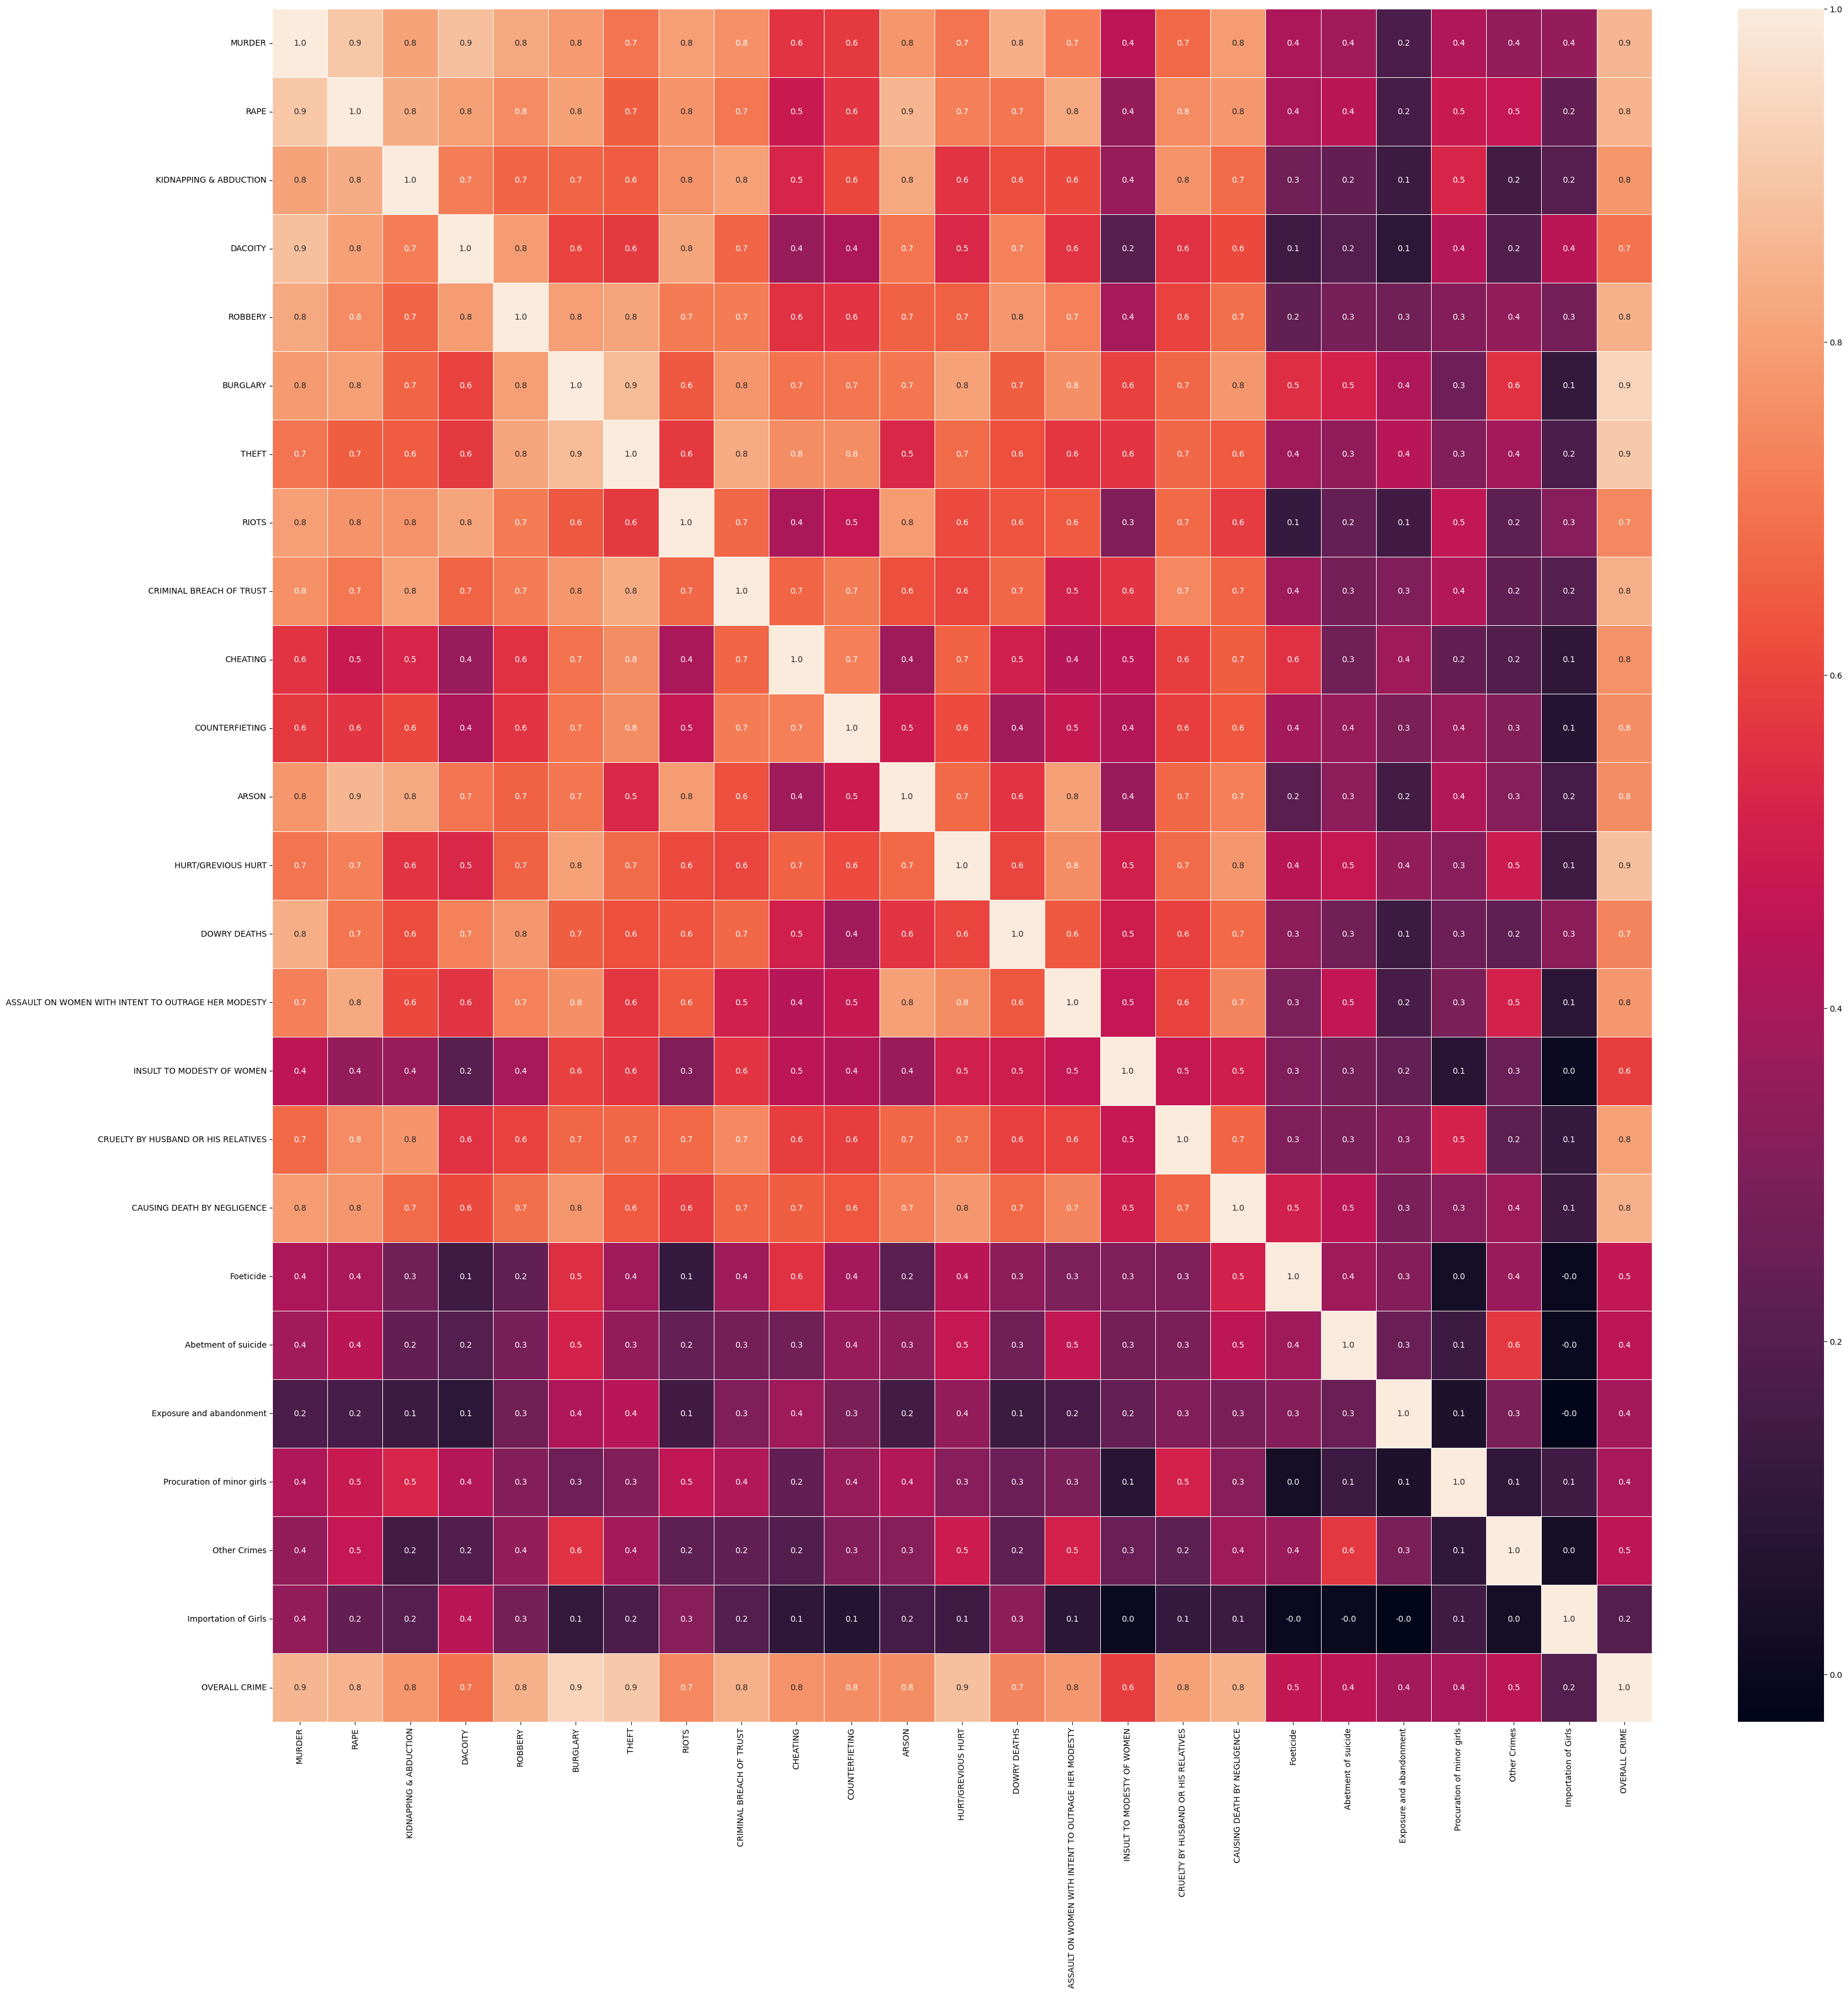

In [28]:
f,ax = plt.subplots(figsize=(38, 38))
sns.heatmap(peaceful_area.corr(), annot=True, linewidths=.4, fmt= '.1f',ax=ax)
plt.show()

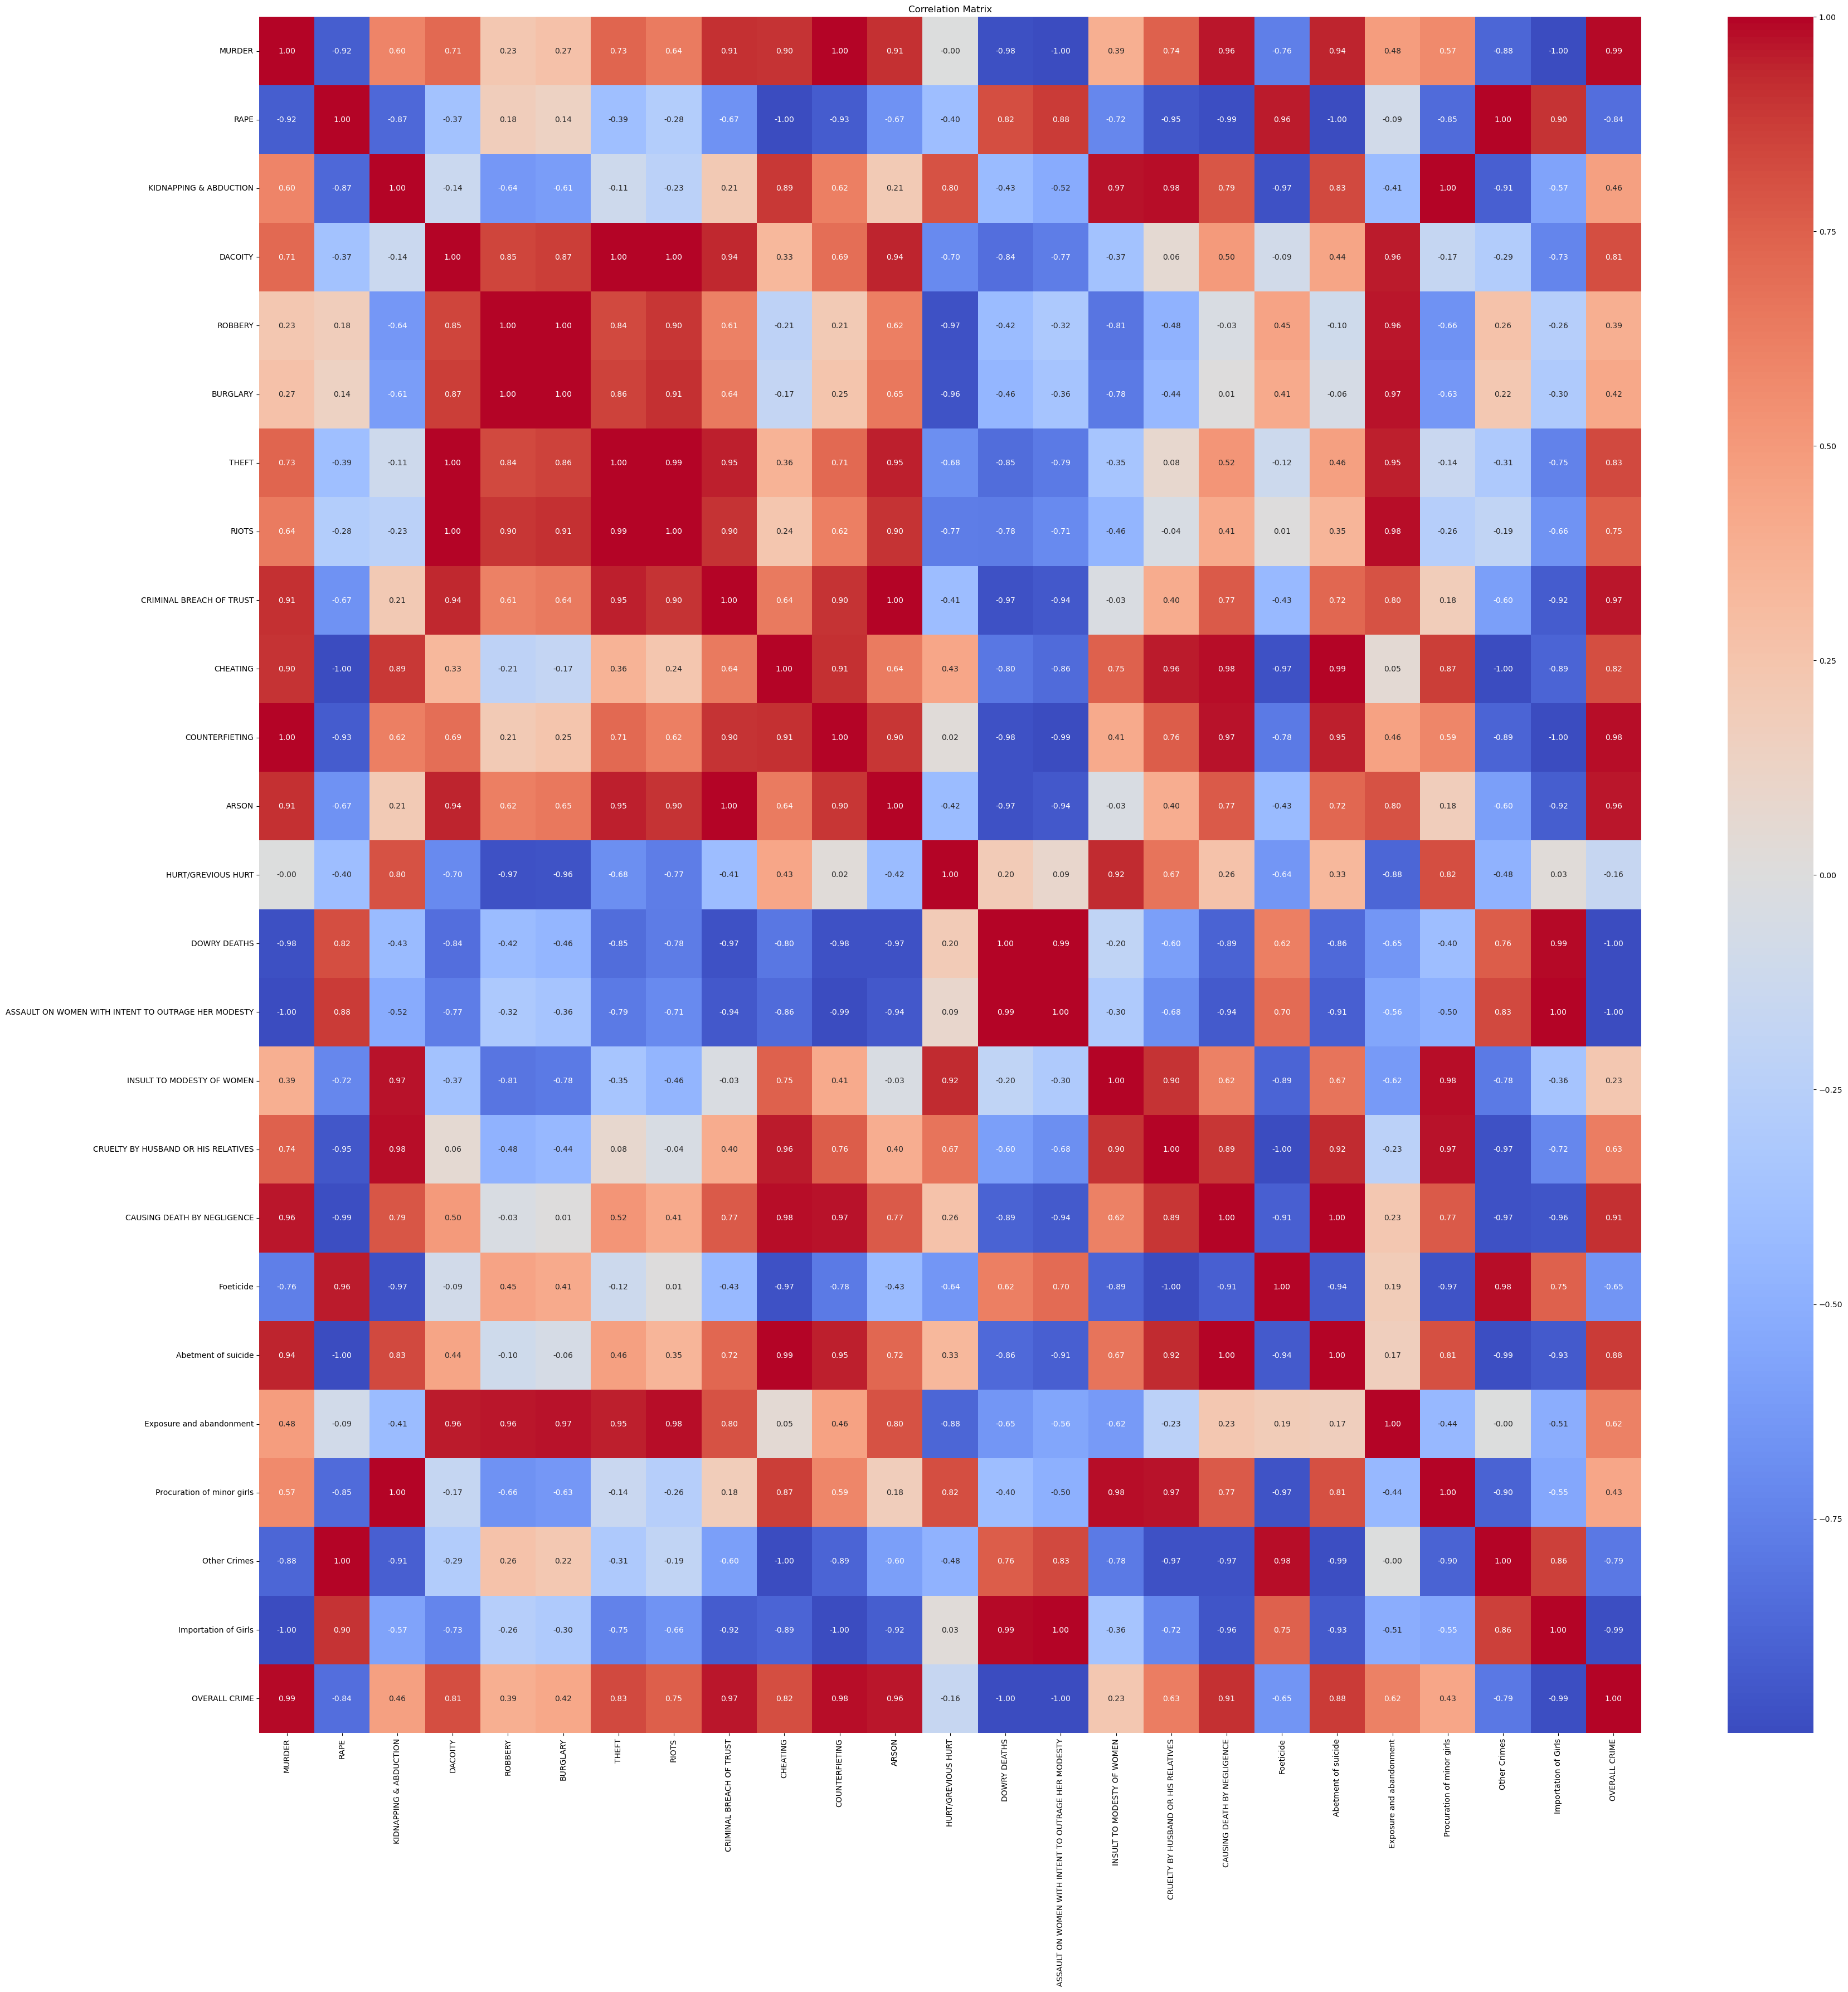

In [29]:
correlation_matrix = sensitive_area.corr()
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [30]:
moderate_area.head()

STATE/UT        DISTRICT   MURDER     RAPE  KIDNAPPING & ABDUCTION  \
212     DELHI UT  DELHI UT TOTAL   6205.0   6424.0                 25083.0   
442       KERALA           TOTAL   4733.0   7447.0                  2891.0   
267      GUJARAT           TOTAL  13775.0   4249.0                 15246.0   
903  WEST BENGAL           TOTAL  21056.0  20787.0                 25999.0   
138        BIHAR           TOTAL  41245.0  13124.0                 37220.0   

     DACOITY  ROBBERY  BURGLARY     THEFT     RIOTS  ...  \
212    381.0   6461.0   23555.0  231546.0     996.0  ...   
442   1364.0   8329.0   46371.0   62353.0   96274.0  ...   
267   3842.0  14383.0   60689.0  213207.0   22192.0  ...   
903   2642.0   7354.0    5500.0  190468.0   51154.0  ...   
138  11099.0  23666.0   40293.0  153372.0  105096.0  ...   

     INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
212                      1687.0                              15211.0   
442                      3304.0                              46074.0   
267                      1365.0                              59431.0   
903                      1554.0                             130668.0   
138                       226.0                              25680.0   

     CAUSING DEATH BY NEGLIGENCE  Foeticide  Abetment of suicide  \
212                       7503.0   3.290151             1.484028   
442                        489.0   4.000000            14.000000   
267                      54385.0  49.000000            16.000000   
903                      37751.0   2.000000            15.000000   
138                      44442.0   9.000000             0.000000   

     Exposure and abandonment  Procuration of minor girls  Other Crimes  \
212                 25.268412                    10.85803    180.527063   
442                 62.000000                   167.00000   2792.000000   
267               1395.000000                   103.00000   2352.000000   
903                 14.000000                  1160.00000    770.000000   
138                  5.000000                   564.00000    131.000000   

     Importation of Girls  OVERALL CRIME  
212              2.371027  388538.798711  
442              0.000000  601612.000000  
267              0.000000  653281.000000  
903            114.000000  663238.000000  
138            440.000000  762555.000000  

[5 rows x 27 columns]

In [31]:
moderate_area.tail()

STATE/UT DISTRICT   MURDER     RAPE  KIDNAPPING & ABDUCTION  \
138          BIHAR    TOTAL  41245.0  13124.0                 37220.0   
415      KARNATAKA    TOTAL  19937.0   5174.0                 10029.0   
762     TAMIL NADU    TOTAL  20127.0   6952.0                 15303.0   
719      RAJASTHAN    TOTAL  15844.0  15798.0                 30727.0   
857  UTTAR PRADESH    TOTAL  65443.0  19058.0                 59266.0   

     DACOITY  ROBBERY  BURGLARY     THEFT     RIOTS  ...  \
138  11099.0  23666.0   40293.0  153372.0  105096.0  ...   
415   2581.0  17287.0   73298.0  199960.0   78421.0  ...   
762   1237.0  11272.0   53339.0  185160.0   37368.0  ...   
719    563.0   9071.0   65268.0  232974.0   36073.0  ...   
857   4809.0  30767.0   65587.0  312047.0   54110.0  ...   

     INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
138                       226.0                              25680.0   
415                       831.0                              30052.0   
762                     10043.0                              18188.0   
719                       354.0                             100101.0   
857                     26511.0                              77617.0   

     CAUSING DEATH BY NEGLIGENCE  Foeticide  Abetment of suicide  \
138                      44442.0        9.0                  0.0   
415                       5078.0       59.0                  4.0   
762                     140193.0        0.0                  9.0   
719                      78350.0      184.0                  9.0   
857                     113821.0       53.0                 73.0   

     Exposure and abandonment  Procuration of minor girls  Other Crimes  \
138                       5.0                       564.0         131.0   
415                     271.0                       112.0         435.0   
762                     104.0                        51.0         449.0   
719                    1426.0                        61.0         283.0   
857                       2.0                        89.0        5243.0   

     Importation of Girls  OVERALL CRIME  
138                 440.0       762555.0  
415                  47.0       778526.0  
762                  15.0       847427.0  
719                   6.0      1049876.0  
857                   3.0      1157861.0  

[5 rows x 27 columns]

In [32]:
moderate_area.tail()

STATE/UT DISTRICT   MURDER     RAPE  KIDNAPPING & ABDUCTION  \
138          BIHAR    TOTAL  41245.0  13124.0                 37220.0   
415      KARNATAKA    TOTAL  19937.0   5174.0                 10029.0   
762     TAMIL NADU    TOTAL  20127.0   6952.0                 15303.0   
719      RAJASTHAN    TOTAL  15844.0  15798.0                 30727.0   
857  UTTAR PRADESH    TOTAL  65443.0  19058.0                 59266.0   

     DACOITY  ROBBERY  BURGLARY     THEFT     RIOTS  ...  \
138  11099.0  23666.0   40293.0  153372.0  105096.0  ...   
415   2581.0  17287.0   73298.0  199960.0   78421.0  ...   
762   1237.0  11272.0   53339.0  185160.0   37368.0  ...   
719    563.0   9071.0   65268.0  232974.0   36073.0  ...   
857   4809.0  30767.0   65587.0  312047.0   54110.0  ...   

     INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
138                       226.0                              25680.0   
415                       831.0                              30052.0   
762                     10043.0                              18188.0   
719                       354.0                             100101.0   
857                     26511.0                              77617.0   

     CAUSING DEATH BY NEGLIGENCE  Foeticide  Abetment of suicide  \
138                      44442.0        9.0                  0.0   
415                       5078.0       59.0                  4.0   
762                     140193.0        0.0                  9.0   
719                      78350.0      184.0                  9.0   
857                     113821.0       53.0                 73.0   

     Exposure and abandonment  Procuration of minor girls  Other Crimes  \
138                       5.0                       564.0         131.0   
415                     271.0                       112.0         435.0   
762                     104.0                        51.0         449.0   
719                    1426.0                        61.0         283.0   
857                       2.0                        89.0        5243.0   

     Importation of Girls  OVERALL CRIME  
138                 440.0       762555.0  
415                  47.0       778526.0  
762                  15.0       847427.0  
719                   6.0      1049876.0  
857                   3.0      1157861.0  

[5 rows x 27 columns]

In [33]:
sensitive_area.columns

Index(['STATE/UT', 'DISTRICT', 'MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION',
       'DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'RIOTS',
       'CRIMINAL BREACH OF TRUST', 'CHEATING', 'COUNTERFIETING', 'ARSON',
       'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
       'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'CAUSING DEATH BY NEGLIGENCE', 'Foeticide', 'Abetment of suicide',
       'Exposure and abandonment', 'Procuration of minor girls',
       'Other Crimes', 'Importation of Girls', 'OVERALL CRIME'],
      dtype='object')

In [34]:
fig = px.scatter_mapbox(
    sensitive_area,
    lat="STATE/UT",
    lon="DISTRICT",
    center={"lat": 20.5937, "lon": 78.9629},  # Map will be centered on Brazil
    width=600,
    height=600,
    hover_data=["MURDER"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

Comprehensive Analysis of Crime Trends in India

Introduction

India, known for its rich cultural heritage and diversity, grapples with the harsh reality of crime that permeates its societal fabric. Crime statistics provide a lens through which we can comprehend the nature and extent of criminal activities prevailing in different regions. This story aims to delve into the multifaceted dimensions of crime in India, examining various categories such as murder, rape, kidnapping & abduction, dacoity, robbery, burglary, theft, riots, and other offenses across different states and Union Territories (UTs).

Methodology

The data utilized in this report is sourced from official records maintained by law enforcement agencies and governmental bodies responsible for collecting and disseminating crime statistics. An extensive analysis covering multiple years is conducted to identify trends and patterns in criminal activities across various districts of India.

Key Findings

Murder: The crime of murder, characterized by the unlawful killing of another person, continues to plague communities across India. While urban areas often witness murders stemming from disputes, rural regions are not immune to cases driven by familial conflicts or caste-related tensions. States such as Uttar Pradesh, Bihar, and Maharashtra frequently report high numbers of murders, reflecting underlying societal challenges. In urban centres like Delhi, Mumbai, and Kolkata, where population density is high, incidents of murder are often linked to organised crime syndicates or gang rivalries. The proliferation of illicit firearms exacerbates the severity of such crimes, necessitating stringent measures to curb illegal arms trafficking and strengthen security protocols.

Rape: Despite legislative reforms and increased awareness, incidents of rape persist, highlighting the vulnerability of women and children to sexual violence. Victims often face significant barriers in accessing justice, including societal stigma and inadequate support services. The need for comprehensive measures to address the root causes of gender-based violence remains paramount.In states like Madhya Pradesh, Rajasthan, and Uttar Pradesh, where patriarchal norms are deeply entrenched, cases of rape are frequently underreported due to fear of retaliation or societal backlash. Initiatives aimed at empowering women, enhancing law enforcement capabilities, and fostering a culture of gender equality are essential to combatting this pervasive crime.

Kidnapping & Abduction: Instances of kidnapping and abduction, particularly of minors, pose a significant threat to public safety. These crimes are often linked to human trafficking networks or familial disputes, underscoring the need for enhanced vigilance and proactive law enforcement efforts.The northeastern states of India, such as Assam, Manipur, and Nagaland, grapple with the challenge of cross-border trafficking, exacerbating the vulnerability of marginalized communities to exploitation and abuse. Collaborative efforts between law enforcement agencies, civil society organizations, and international partners are crucial to addressing this transnational crime.

Dacoity & Robbery: Armed robberies and dacoity incidents continue to occur in various parts of the country, with criminals targeting vulnerable individuals and establishments. The proliferation of illicit firearms exacerbates the severity of such crimes, necessitating stringent measures to curb illegal arms trafficking and strengthen security protocols.In states like Bihar, Jharkhand, and Chhattisgarh, where socio-economic disparities are pronounced, instances of dacoity often stem from underlying grievances related to land disputes, resource allocation, or caste-based discrimination. Comprehensive socio-economic interventions aimed at addressing these root causes are essential to curbing the incidence of dacoity and robbery.

Burglary & Theft: Property crimes, including burglary and theft, remain pervasive, impacting both residential and commercial properties. Inadequate infrastructure and resource constraints often hamper law enforcement agencies' ability to effectively combat these offenses, emphasizing the importance of community engagement and proactive crime prevention strategies.In metropolitan cities like Bangalore, Hyderabad, and Pune, where rapid urbanization has led to increased demand for housing and commercial spaces, incidents of burglary and theft are on the rise. Enhanced coordination between law enforcement agencies, private security firms, and community watch groups is essential to safeguarding public and private assets.

Riots: Communal tensions and social unrest periodically manifest in the form of riots, posing a significant challenge to law enforcement authorities. Prompt intervention and effective conflict resolution mechanisms are essential to prevent the escalation of violence and preserve communal harmony. In states like Uttar Pradesh, Gujarat, and West Bengal, where inter-communal tensions are often fueled by political rhetoric or socio-religious polarization, the risk of riots remains high. Strengthening community policing initiatives, promoting inter-faith dialogue, and fostering a culture of tolerance and inclusivity are critical to preventing the outbreak of communal violence.

Other Offenses: A wide array of offenses, ranging from criminal breach of trust to cruelty by husband or relatives, contribute to the overall crime landscape in India. Each offense carries its unique socio-economic implications, necessitating tailored interventions to address underlying root causes effectively. Strengthening the legal framework, enhancing law enforcement capabilities, and promoting community-led initiatives are essential to addressing these diverse challenges and fostering a safe and secure environment for all citizens.

Conclusion

The analysis of crime statistics in India reveals a complex and dynamic landscape characterized by various socio-economic and cultural factors. While law enforcement agencies play a crucial role in maintaining public safety and security, addressing the underlying drivers of crime requires a multi-stakeholder approach encompassing governmental, non-governmental, and community-based organizations. By fostering collaboration and implementing evidence-based interventions, India can strive towards creating safer and more resilient communities for its citizens.

With a comprehensive understanding of crime trends and patterns, policymakers can formulate targeted interventions to address the root causes of criminal activities and foster a culture of lawfulness and social cohesion. By prioritizing crime prevention, victim support, and rehabilitation efforts, India can aspire to become a safer and more just society for generations to come.
